In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dff = sns.load_dataset('diamonds')
df = dff.copy()
print(df.head())
print(df.info())

   carat      cut color clarity  depth  table  price    x    y    z
0   0.23    Ideal     E     SI2  61.50  55.00    326 3.95 3.98 2.43
1   0.21  Premium     E     SI1  59.80  61.00    326 3.89 3.84 2.31
2   0.23     Good     E     VS1  56.90  65.00    327 4.05 4.07 2.31
3   0.29  Premium     I     VS2  62.40  58.00    334 4.20 4.23 2.63
4   0.31     Good     J     SI2  63.30  58.00    335 4.34 4.35 2.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: categor

In [ ]:
df.isnull().any()

,0
carat,False
cut,False
color,False
clarity,False
depth,False
table,False
price,False
x,False
y,False
z,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()
for i in df.columns:
  if(df[i].dtype == 'category'):
    df[i] = enc.fit_transform(df[i])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB
None


In [ ]:
X = df.drop('cut', axis=1)
y = df['cut']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,precision_score, recall_score, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       335
           1       0.66      0.69      0.68      1004
           2       0.80      0.80      0.80      4292
           3       0.74      0.73      0.74      2775
           4       0.54      0.55      0.54      2382

    accuracy                           0.72     10788
   macro avg       0.72      0.72      0.72     10788
weighted avg       0.72      0.72      0.72     10788



In [ ]:
accuracy_score(y_test, y_pred)

0.7157026325546904

<Axes: >

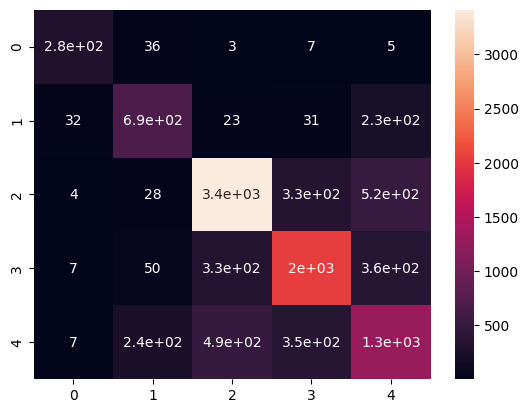

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [ ]:
############################################################################################################################################################################################################################################################

In [ ]:
dff.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df_2 = df.copy()

In [ ]:
df_2['cut'].value_counts()

,count
cut,
2,21551
3,13791
4,12082
1,4906
0,1610


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

u_sam = RandomUnderSampler(random_state=42)
o_sam = RandomOverSampler(random_state=42)

In [ ]:
X_usam, y_usam = u_sam.fit_resample(df_2.drop('cut', axis = 1), df_2['cut'])
df_unsam = pd.concat([pd.DataFrame(X_usam, columns=df_2.drop('cut', axis = 1).columns), pd.Series(y_usam, name='cut')])

y_usam.value_counts()

,count
cut,
0,1610
1,1610
2,1610
3,1610
4,1610


In [ ]:
X_osam, y_osam = o_sam.fit_resample(df_2.drop('cut', axis = 1), df_2['cut'])
df_osam = pd.concat([pd.DataFrame(X_osam, columns=df_2.drop('cut', axis = 1).columns), pd.Series(y_osam, name='cut')])

y_osam.value_counts()

,count
cut,
2,21551
3,21551
1,21551
4,21551
0,21551


In [ ]:
# df_unsam['cut']

In [ ]:
# df_osam['cut']

In [ ]:
y_usam

,cut
8,0
91,0
97,0
123,0
124,0
...,...
53548,4
24611,4
8433,4
41965,4


In [ ]:
y_osam

,cut
0,2
1,3
2,1
3,3
4,1
...,...
107750,4
107751,4
107752,4
107753,4


In [ ]:
X_osam

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
107750,0.30,0,5,62.9,58.0,710,4.23,4.26,2.67
107751,1.50,5,4,63.3,54.0,11879,7.26,7.33,4.62
107752,0.78,4,4,61.7,56.0,2947,5.92,5.94,3.66
107753,1.21,0,7,62.4,56.0,13630,6.76,6.83,4.24


In [ ]:
X_usam

,carat,color,clarity,depth,table,price,x,y,z
8,0.22,1,5,65.1,61.0,337,3.87,3.78,2.49
91,0.86,1,3,55.1,69.0,2757,6.45,6.33,3.52
97,0.96,2,3,66.3,62.0,2759,6.27,5.95,4.07
123,0.70,2,5,64.5,57.0,2762,5.57,5.53,3.58
124,0.70,2,5,65.3,55.0,2762,5.63,5.58,3.66
...,...,...,...,...,...,...,...,...,...
53548,0.71,0,2,61.7,59.0,2693,5.70,5.74,3.53
24611,2.11,5,3,63.8,54.0,12937,8.13,8.19,5.21
8433,1.08,2,3,62.6,56.0,4407,6.55,6.61,4.12
41965,0.23,1,7,61.1,59.0,505,3.94,3.98,2.42


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_usam, y_usam, test_size=0.2, random_state=42)
X_train.shape

(6440, 9)

In [ ]:
svm = LinearSVC(random_state=42)

In [ ]:
### No need for scaling in SVC

In [ ]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       337
           1       0.18      0.69      0.29       320
           2       0.57      0.01      0.02       331
           3       0.26      0.34      0.29       295
           4       0.42      0.02      0.03       327

    accuracy                           0.20      1610
   macro avg       0.29      0.21      0.13      1610
weighted avg       0.29      0.20      0.12      1610



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
### KNN same as linear regression but scaling is necessary

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
clf = setup(data = df, target = 'cut', session_id = 123)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,cut
2,Target type,Multiclass
3,Target mapping,"Fair: 0, Good: 1, Ideal: 2, Premium: 3, Very Good: 4"
4,Original data shape,"(53940, 10)"
5,Transformed data shape,"(53940, 23)"
6,Transformed train set shape,"(37758, 23)"
7,Transformed test set shape,"(16182, 23)"
8,Numeric features,7
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7959,0.9373,0.7959,0.7912,0.7908,0.7106,0.7126,6.5500
xgboost,Extreme Gradient Boosting,0.7958,0.9386,0.7958,0.7908,0.7909,0.7108,0.7127,2.6680
rf,Random Forest Classifier,0.7658,0.9203,0.7658,0.7577,0.7557,0.6673,0.6712,6.6660
gbc,Gradient Boosting Classifier,0.7594,0.0000,0.7594,0.7558,0.7447,0.6576,0.6652,25.6360
dt,Decision Tree Classifier,0.7064,0.7975,0.7064,0.7078,0.7070,0.5903,0.5904,0.5910
et,Extra Trees Classifier,0.6881,0.8820,0.6881,0.6729,0.6768,0.5565,0.5589,6.1920
ada,Ada Boost Classifier,0.6801,0.0000,0.6801,0.6453,0.6461,0.5381,0.5478,1.6330
lda,Linear Discriminant Analysis,0.6257,0.0000,0.6257,0.5936,0.5892,0.4516,0.4638,0.3090
ridge,Ridge Classifier,0.5814,0.0000,0.5814,0.4973,0.4997,0.3628,0.3940,0.4260
nb,Naive Bayes,0.5561,0.7767,0.5561,0.5334,0.5381,0.3683,0.3717,0.2850


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
!pip install lazypredict

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df.columns:
  if(df[i].dtype == 'category'):
    df[i] = enc.fit_transform(df[i])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB
None


In [ ]:
X = df.drop(columns=['cut'])
y = df['cut']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from lazypredict.Supervised import LazyClassifier


In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]